## Classifying flowers with pretrained mobilenetV2

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

from keras.optimizers import Adam
from keras.utils import plot_model

import torch

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
img_height , img_width = 180, 180
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode = 'categorical',
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
# Preprocessing and load the validation data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode ='categorical',
    validation_split =0.2,
    subset= 'validation',
    seed =123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
## Class names list that sotres the class names of the flowers dataset
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


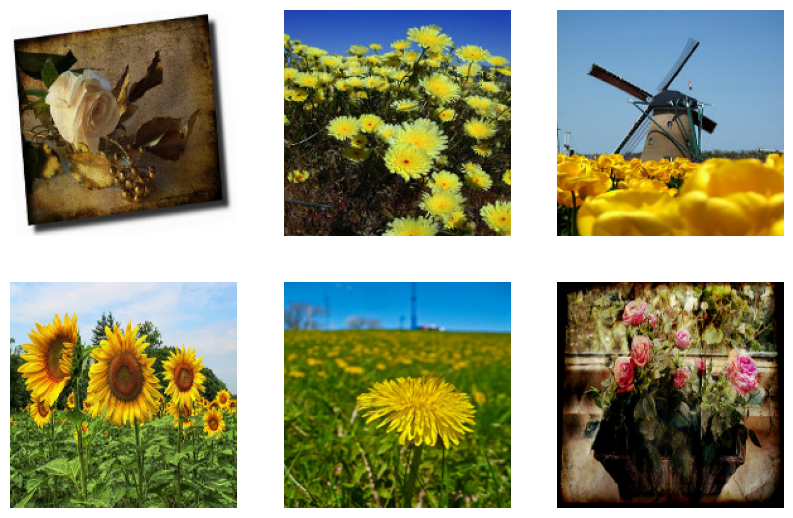

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.axis('off')

## Resnet50 Model

In [ ]:
def resnet50_model(in_shape, num_classes):

  ###Importing the model
  resnet_model = Sequential()
  pretrained_model = keras.applications.ResNet50(include_top=False, input_shape=in_shape, pooling='avg', classes=num_classes, weights='imagenet')

  for layer in pretrained_model.layers:
    layer.trainable = False
  resnet_model.add(pretrained_model)

  # Add dense layers for classification
  resnet_model.add(Dense(512, activation='relu'))
  resnet_model.add(Dropout(0.6))
  resnet_model.add(Dense(256, activation='relu'))
  resnet_model.add(Dense(5, activation='softmax'))

  resnet_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics='accuracy')

  return resnet_model

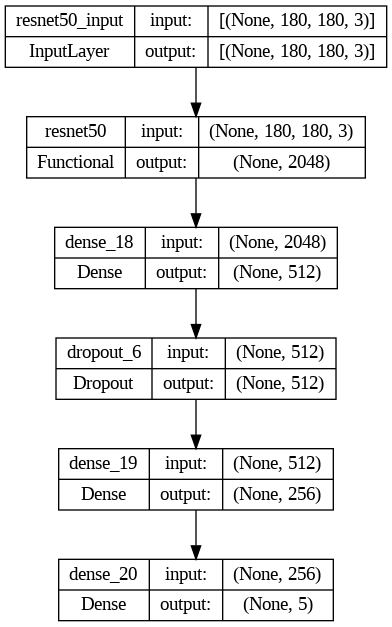

In [ ]:
input_shape = (180, 180, 3)
num_classes = 5

resnet50 = resnet50_model(input_shape, num_classes)

plot_model(resnet50, show_shapes=True, show_layer_names=True)

In [ ]:
# Train upto 10 epochs
# Fit the model in a variable called history for further analysis
history = resnet50.fit(train_ds, validation_data=val_ds, epochs=10,)

Epoch 1/10
92/92 [==============================] - 14s 111ms/step - loss: 0.9398 - accuracy: 0.6846 - val_loss: 0.4361 - val_accuracy: 0.8406
Epoch 2/10
92/92 [==============================] - 9s 96ms/step - loss: 0.5409 - accuracy: 0.7997 - val_loss: 0.3913 - val_accuracy: 0.8420
Epoch 3/10
92/92 [==============================] - 12s 129ms/step - loss: 0.4702 - accuracy: 0.8317 - val_loss: 0.4308 - val_accuracy: 0.8365
Epoch 4/10
92/92 [==============================] - 9s 98ms/step - loss: 0.3930 - accuracy: 0.8573 - val_loss: 0.3921 - val_accuracy: 0.8515
Epoch 5/10
92/92 [==============================] - 10s 101ms/step - loss: 0.3908 - accuracy: 0.8525 - val_loss: 0.3453 - val_accuracy: 0.8706
Epoch 6/10
92/92 [==============================] - 9s 93ms/step - loss: 0.3499 - accuracy: 0.8702 - val_loss: 0.3476 - val_accuracy: 0.8760
Epoch 7/10
92/92 [==============================] - 9s 98ms/step - loss: 0.3322 - accuracy: 0.8798 - val_loss: 0.3315 - val_accuracy: 0.8719
Epoch 8

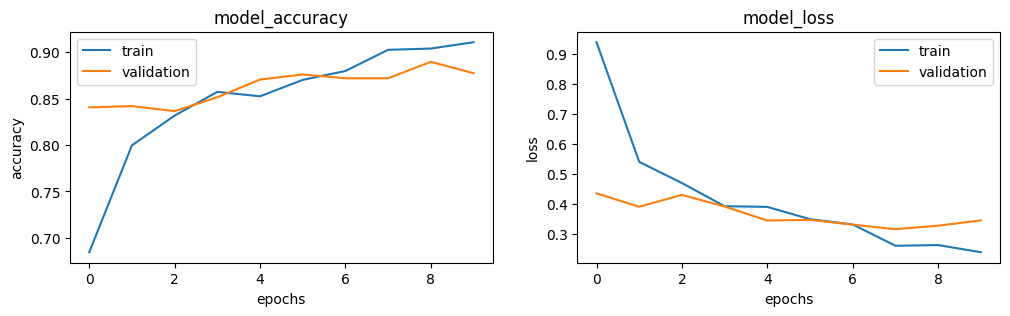

In [ ]:
plt.figure(1, figsize=(12, 3))

plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])


plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])

plt.show()

## VGG16 Model

In [ ]:
def vgg16_model(in_shape, num_classes):

  ###Importing the model
  vgg16 = Sequential()
  pretrained_model = keras.applications.vgg16.VGG16(include_top=False, input_shape=in_shape, pooling='avg', classes=num_classes, weights='imagenet')

  for layer in pretrained_model.layers:
    layer.trainable = False
  vgg16.add(pretrained_model)

  # Add dense layers for classification
  vgg16.add(Dense(512, activation='relu'))
  vgg16.add(Dropout(0.6))
  vgg16.add(Dense(256, activation='relu'))
  vgg16.add(Dense(5, activation='softmax'))

  vgg16.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics='accuracy')

  return vgg16

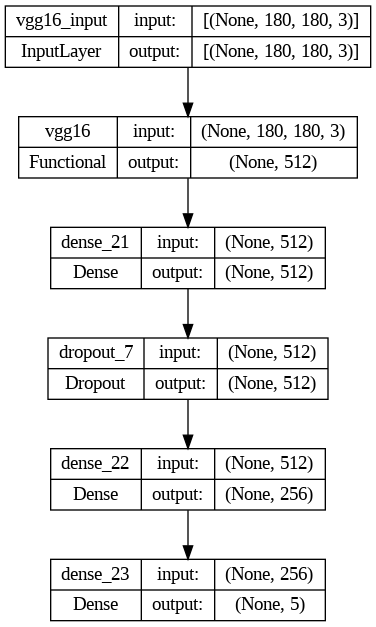

In [ ]:
input_shape = (180, 180, 3)
num_classes = 5

vgg16 = vgg16_model(input_shape, num_classes)

plot_model(vgg16, show_shapes=True, show_layer_names=True)

In [ ]:
history2 = vgg16.fit(train_ds, validation_data=val_ds, epochs=10,)

Epoch 1/10
92/92 [==============================] - 14s 124ms/step - loss: 2.2218 - accuracy: 0.6226 - val_loss: 0.6371 - val_accuracy: 0.8052
Epoch 2/10
92/92 [==============================] - 12s 124ms/step - loss: 0.8778 - accuracy: 0.7599 - val_loss: 0.5077 - val_accuracy: 0.8229
Epoch 3/10
92/92 [==============================] - 12s 125ms/step - loss: 0.6729 - accuracy: 0.7909 - val_loss: 0.4966 - val_accuracy: 0.8270
Epoch 4/10
92/92 [==============================] - 12s 125ms/step - loss: 0.5422 - accuracy: 0.8232 - val_loss: 0.4888 - val_accuracy: 0.8297
Epoch 5/10
92/92 [==============================] - 12s 128ms/step - loss: 0.4566 - accuracy: 0.8454 - val_loss: 0.4512 - val_accuracy: 0.8447
Epoch 6/10
92/92 [==============================] - 12s 126ms/step - loss: 0.3883 - accuracy: 0.8634 - val_loss: 0.4455 - val_accuracy: 0.8447
Epoch 7/10
92/92 [==============================] - 12s 129ms/step - loss: 0.3657 - accuracy: 0.8781 - val_loss: 0.4714 - val_accuracy: 0.8297

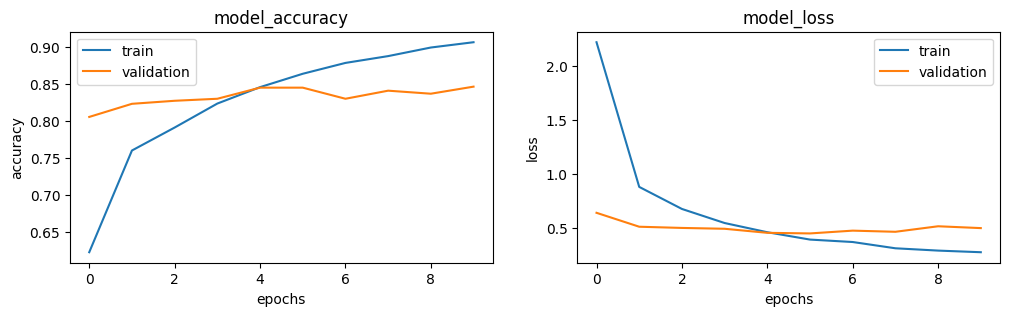

In [ ]:
plt.figure(1, figsize=(12, 3))

plt.subplot(121)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])


plt.subplot(122)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])

plt.show()

## Resnet 152 Model

In [ ]:
def resnet152_model(in_shape, num_classes):

  ###Importing the model
  resnet152 = Sequential()
  pretrained_model = keras.applications.ResNet152(include_top=False, input_shape=in_shape, pooling='avg', classes=num_classes, weights='imagenet')

  for layer in pretrained_model.layers:
    layer.trainable = False
  resnet152.add(pretrained_model)

  # Add dense layers for classification
  resnet152.add(Dense(512, activation='relu'))
  resnet152.add(Dropout(0.6))
  resnet152.add(Dense(256, activation='relu'))
  resnet152.add(Dense(5, activation='softmax'))

  resnet152.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics='accuracy')

  return resnet152

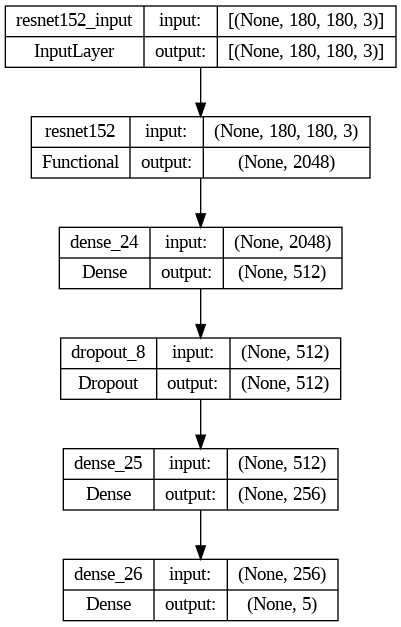

In [ ]:
input_shape = (180, 180, 3)
num_classes = 5

resnet152 = resnet152_model(input_shape, num_classes)

plot_model(resnet152, show_shapes=True, show_layer_names=True)

In [ ]:
history3 = resnet152.fit(train_ds, validation_data=val_ds, epochs=10,)

Epoch 1/10
92/92 [==============================] - 36s 292ms/step - loss: 0.9514 - accuracy: 0.6863 - val_loss: 0.4774 - val_accuracy: 0.8365
Epoch 2/10
92/92 [==============================] - 21s 229ms/step - loss: 0.5539 - accuracy: 0.8014 - val_loss: 0.3609 - val_accuracy: 0.8706
Epoch 3/10
92/92 [==============================] - 21s 220ms/step - loss: 0.4403 - accuracy: 0.8403 - val_loss: 0.3513 - val_accuracy: 0.8706
Epoch 4/10
92/92 [==============================] - 22s 231ms/step - loss: 0.4102 - accuracy: 0.8467 - val_loss: 0.3628 - val_accuracy: 0.8706
Epoch 5/10
92/92 [==============================] - 21s 220ms/step - loss: 0.3651 - accuracy: 0.8668 - val_loss: 0.3267 - val_accuracy: 0.8719
Epoch 6/10
92/92 [==============================] - 21s 219ms/step - loss: 0.3149 - accuracy: 0.8866 - val_loss: 0.3349 - val_accuracy: 0.8883
Epoch 7/10
92/92 [==============================] - 21s 225ms/step - loss: 0.2925 - accuracy: 0.8900 - val_loss: 0.3344 - val_accuracy: 0.8815

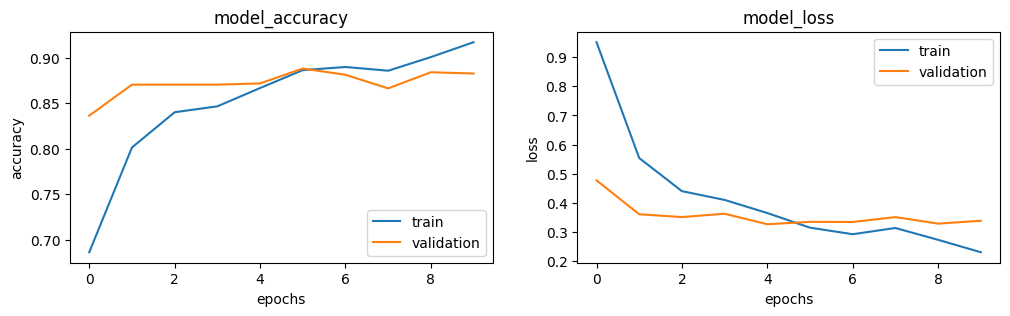

In [ ]:
plt.figure(1, figsize=(12, 3))

plt.subplot(121)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])


plt.subplot(122)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])

plt.show()

## Predicting an image using the best model - Resnet152

1/1 [==============================] - 4s 4s/step


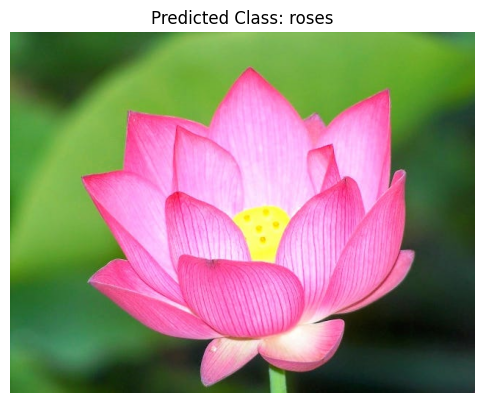

In [ ]:
# Function to preprocess the input image
def preprocess_image(image_path, target_size=(180, 180)):
    img = keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    return img_array

# Function to make predictions using the model
def predict_flower(image_path, model):
    # Preprocess the input image
    img = preprocess_image(image_path)

    # Make predictions
    predictions = model.predict(img)

    # Decode predictions
    predicted_class = class_names[np.argmax(predictions)]

    return predicted_class

# Path to the random flower image
random_flower_image_path = "test_images/flower_test.jpg"  # Replace with the path to your image

# Predict the flower class
predicted_class = predict_flower(random_flower_image_path, resnet152)

# Display the input image along with the predicted class
plt.figure(figsize=(6, 6))
img = keras.preprocessing.image.load_img(random_flower_image_path)
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()